In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) 
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [3]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [4]:
# How many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [5]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [6]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real diaster)" if target > 0 else "(not real diaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real diaster)
Text:
CommoditiesåÊAre Crashing Like It's 2008 All Over Again http://t.co/nJD1N5TxXe via @business

---

Target: 0 (not real diaster)
Text:
@ego_resolution im glad. My gay can heal 1000 wounds

---

Target: 1 (real diaster)
Text:
Humboldt Cty Sheriff's Office has issued an evacuation advisory for 10 residence in the Lassics area... more info at http://t.co/ERUzBUQZYU

---

Target: 1 (real diaster)
Text:
y'all read 12000 Nigerian refugees repatriated from Cameroon http://t.co/aVwE1LBvhn

---

Target: 1 (real diaster)
Text:
@Bill_Roose That looks so desolate and just...depressing

---



In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)
 

In [9]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [10]:
# Check the first 10 samples 
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### Converting text into numbers

In [11]:
# Tokenziation - direct mapping of token (a token could be a word or a character) to number
# Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add )
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None, # how long do you want your sequences to be?
                                    pad_to_max_tokens=False)

In [17]:
len(train_sentences[0].split())

7

In [18]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [19]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [20]:
# Fit the text vectorizer instance to the training data using the adapt() method
text_vectorizer.adapt(train_sentences)

In [21]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [22]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
@SunderCR two hours of Sandstorm remixes. All merged together. No between-song silence.        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[7935,  116,  683,    6,  365, 9204,   44,    1, 1168,   40,    1,
        2708,    0,    0,    0]], dtype=int64)>

In [23]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # the most common words in the vocab
bottom_5_words = words_in_vocab[-5:] # the least common words in the vocab
print(f"Most common words in vocab: {top_5_words}")
print(f"Least common words in vocab: {bottom_5_words}")

Most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
Least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [24]:
# how long is our vocab?
len(words_in_vocab)

10000

In [25]:
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim=max_vocab_length, # set the input shape
                             output_dim=128, # set the size of the embedding vector
                             embeddings_initializer="uniform", # default, initialize embedding vectors randomly
                             input_length=max_length # how long is each input
                             )

embedding

c:\Users\Windows 11\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [26]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation, aka tokenization first)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
the sunset boys wreck my bed   original 1979 usa gimp label  vinyl 7' 45  newave http://t.co/X0QLgwoyMT http://t.co/hQNx8qMeG3        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03139236,  0.0231681 ,  0.01663445, ..., -0.02992347,
         -0.03045458,  0.03806814],
        [ 0.0138596 , -0.0144291 , -0.03774111, ...,  0.00764203,
          0.01448284,  0.00872648],
        [ 0.03650173,  0.00841802, -0.04264411, ..., -0.04342257,
          0.03045653, -0.01920747],
        ...,
        [-0.02204788, -0.03471892, -0.02905784, ..., -0.02152259,
          0.03515315, -0.03877151],
        [ 0.04971577, -0.04007041,  0.04314366, ..., -0.01149235,
          0.02916706,  0.0203652 ],
        [-0.04393498,  0.01759137,  0.00104018, ..., -0.04200016,
         -0.00144944,  0.01777038]]], dtype=float32)>

In [27]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03139236,  0.0231681 ,  0.01663445, -0.03975085,  0.00935534,
        0.04636094,  0.03124073, -0.01069715,  0.01629912, -0.00884525,
        0.02372273, -0.01384506, -0.00176035, -0.00478635,  0.0258121 ,
        0.03434682,  0.0151039 , -0.00577649, -0.02251136, -0.04240274,
        0.03645755,  0.04860843, -0.03210348,  0.02328995, -0.01131935,
        0.02225668,  0.04883886,  0.02725542, -0.01564794, -0.04011428,
       -0.00534507, -0.02340353, -0.0332009 , -0.0316178 , -0.03331088,
        0.017309  , -0.03096447, -0.00121211, -0.00495593,  0.0465326 ,
       -0.01744692, -0.00738668,  0.029461  ,  0.0008544 , -0.04007376,
        0.02308666,  0.04064867,  0.04892334,  0.03906338,  0.00795835,
        0.01182413,  0.01476386,  0.02395954,  0.00392996, -0.01715449,
        0.04254303,  0.0204591 ,  0.00296526, -0.04118115,  0.01976892,
        0.0324908 , -0.03749107,  0.01788876, -0.00070007, -0.01894088,
       -0.037308

### Modelling a text dataset (setting up our modelling experiments)

In [32]:
# Function to evalaute: accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  ----
  y_true = true labels in the form of a 1D array
  y_pred = predicted label in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall and f1-score between y_true and y_pred.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100 # get accuracy score in percentage value
  # Calculate model precision, recall and f1 score using "weighted" avergage
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  # Create a dictionary of model results
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

#### Base model

In [33]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
                    ("clf", MultinomialNB()) # model the text converted to numbers
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)
print(model_0)

# Let's evalaute our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

# Make predictions
baseline_preds = model_0.predict(val_sentences)
print(baseline_preds[:20])

# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
Our baseline model achieves an accuracy of: 79.27%
[1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1]
CPU times: total: 62.5 ms
Wall time: 120 ms


{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

#### Simple dense model

In [35]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers 
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_sentences,
                        train_labels, 
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])
# Evaluate model 1
model_1.evaluate(val_sentences, val_labels)

# Make predictions with model_1
model_1_pred_probs = model_1.predict(val_sentences)

# Convert model_1 pred probs from probabilities to prediction labels
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

# Evaluate model_1 with our evaluation function
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

Saving TensorBoard log files to: model_logs/model_1_dense/20250222-153625
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6449 - loss: 0.6494 - val_accuracy: 0.7625 - val_loss: 0.5385
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8180 - loss: 0.4616 - val_accuracy: 0.7861 - val_loss: 0.4728
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8592 - loss: 0.3523 - val_accuracy: 0.7835 - val_loss: 0.4558
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8895 - loss: 0.2903 - val_accuracy: 0.7861 - val_loss: 0.4649
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9128 - loss: 0.2419 - val_accuracy: 0.7913 - val_loss: 0.4835
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.5172 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


{'accuracy': 79.13385826771653,
 'precision': 0.7991778804390164,
 'recall': 0.7913385826771654,
 'f1': 0.7875666235705995}

In [36]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

#### LSTM

In [37]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
# x = layers.LSTM(64, activation="tanh", return_sequences=True)(x) # use return_sequences=True if you want to stack recurrent layers 
# print(f"After LSTM cell with return_sequences=True: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
print(f"After LSTM cell: {x.shape}")
# x = layers.Dense(64, activation="relu")(x) # optional dense layer to have on top of LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)

# Round out pred probs and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

# Calculate our LSTM model's results
model_2_preds = tf.squeeze(tf.round(model_2_preds))

# Calculate our model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

After embedding: (None, 15, 128)
After LSTM cell: (None, 64)
Saving TensorBoard log files to: model_logs/model_2_LSTM/20250222-153935
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8850 - loss: 0.3106 - val_accuracy: 0.7782 - val_loss: 0.5880
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9438 - loss: 0.1563 - val_accuracy: 0.7822 - val_loss: 0.5991
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9531 - loss: 0.1276 - val_accuracy: 0.7848 - val_loss: 0.7372
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9609 - loss: 0.1013 - val_accuracy: 0.7717 - val_loss: 0.7610
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9703 - loss: 0.0850 - val_accuracy: 0.7769 - val_loss: 0.8380
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


{'accuracy': 77.69028871391076,
 'precision': 0.7795556446582096,
 'recall': 0.7769028871391076,
 'f1': 0.7744873664507351}

In [38]:
import numpy as np
np.array(list(model_2_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

#### GRU

In [39]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, activation="tanh", return_sequences=True)(x) # return_sequences=True is required for stacking recurrent cells
# print(x.shape)
x = layers.GRU(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

# Compile model_3 (GRU)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])
# Make predictions with the trained model
model_3_pred_probs = model_3.predict(val_sentences)

# Convert model 3 pred probs into labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

# Calculate results for model 3
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)

Saving TensorBoard log files to: model_logs/model_3_GRU/20250222-154132
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8810 - loss: 0.2706 - val_accuracy: 0.7717 - val_loss: 0.7362
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9714 - loss: 0.0802 - val_accuracy: 0.7822 - val_loss: 0.7729
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9787 - loss: 0.0625 - val_accuracy: 0.7677 - val_loss: 0.8790
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9776 - loss: 0.0582 - val_accuracy: 0.7703 - val_loss: 1.0501
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9746 - loss: 0.0605 - val_accuracy: 0.7756 - val_loss: 1.1682
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [40]:
import numpy as np
np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

#### Bidirectional RNN model

In [41]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # return_sequences=True required for stacking RNN layers
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_4_bidirectional")])

# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)

# Convert pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

# Calculate model 4 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20250222-154238
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9559 - loss: 0.1964 - val_accuracy: 0.7690 - val_loss: 0.9763
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9753 - loss: 0.0569 - val_accuracy: 0.7743 - val_loss: 1.2620
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9803 - loss: 0.0469 - val_accuracy: 0.7625 - val_loss: 1.2396
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9813 - loss: 0.0423 - val_accuracy: 0.7612 - val_loss: 1.2670
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9810 - loss: 0.0421 - val_accuracy: 0.7625 - val_loss: 1.2963
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 


{'accuracy': 76.24671916010499,
 'precision': 0.7661237980682454,
 'recall': 0.7624671916010499,
 'f1': 0.7592074612720654}

In [42]:
import numpy as np
np.array(list(model_4_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

#### Conv1D

In [44]:
# Let's do a little test to see what things look like through the eyes of a Conv1D layer
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d_layer = layers.Conv1D(filters=32,
                              kernel_size=5, # setting this to 5 means it'll look at 5 words at a time, 3 would mean 3 words at a time
                              activation="relu")
conv_1d_output = conv_1d_layer(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
print(f"Embedding output shape: {embedding_test.shape}")
print(f"Conv1D output shape: {conv_1d_output.shape}")
print(f"Max pool output shape: {max_pool_output.shape}")

# Let's see the outputs of each layer
print(f"Embedding output: {embedding_test}")
print(f"Conv1D output: {conv_1d_output}")
print(f"Max pool output: {max_pool_output}")

# Create 1-dimensional CNN to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

BATCH_SIZE = 32

# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              batch_size=BATCH_SIZE,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_conv1d")])

# Make predictions with our 1D CNN
model_5_pred_probs = model_5.predict(val_sentences)

# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

# Calculate results for model 5
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

Embedding output shape: (1, 15, 128)
Conv1D output shape: (1, 11, 32)
Max pool output shape: (1, 32)
Embedding output: [[[-0.0831018  -0.00030018  0.06509646 ... -0.06877939 -0.04098093
    0.00807092]
  [-0.06335875  0.01640296  0.04964107 ... -0.00467809 -0.04227309
    0.05506035]
  [-0.03192609 -0.04654014  0.02278936 ... -0.04305715 -0.00477464
   -0.03877975]
  ...
  [-0.01649244 -0.02858805 -0.02229907 ... -0.0279242  -0.0118959
   -0.02176852]
  [-0.01649244 -0.02858805 -0.02229907 ... -0.0279242  -0.0118959
   -0.02176852]
  [-0.01649244 -0.02858805 -0.02229907 ... -0.0279242  -0.0118959
   -0.02176852]]]
Conv1D output: [[[0.0000000e+00 0.0000000e+00 0.0000000e+00 8.4632374e-02 6.4821035e-02
   0.0000000e+00 0.0000000e+00 0.0000000e+00 4.5419924e-02 0.0000000e+00
   6.6874072e-02 5.3342421e-02 4.0756803e-02 9.8828070e-02 0.0000000e+00
   0.0000000e+00 7.4360115e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
   0.0000000e+00 0.0000000e+00 0.0000000e+00 8.6393125e-02 6.3569836e-0

{'accuracy': 75.45931758530183,
 'precision': 0.7542287067251596,
 'recall': 0.7545931758530183,
 'f1': 0.7543050991002516}

#### Transfer Learning

In [45]:
sample_sentence

"There's a flood in my street!"

In [46]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [47]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [51]:
import tf_keras
# Create model using the Sequential API
model_6 = tf_keras.Sequential([
  sentence_encoder_layer,
  tf_keras.layers.Dense(64, activation="relu"),
  tf_keras.layers.Dense(1, activation="sigmoid", name="output_layer")                               
], name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)

# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)

Epoch 1/5



215/215 [==============================] - 4s 6ms/step - loss: 0.5111 - accuracy: 0.7783 - val_loss: 0.4525 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4150 - accuracy: 0.8135 - val_loss: 0.4349 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 1s 4ms/step - loss: 0.4011 - accuracy: 0.8200 - val_loss: 0.4307 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3922 - accuracy: 0.8285 - val_loss: 0.4278 - val_accuracy: 0.8136
Epoch 5/5
24/24 [==============================] - 0s 3ms/step


In [52]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

### Comparing models

In [53]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,79.133858,0.799178,0.791339,0.787567
2_lstm,77.690289,0.779556,0.776903,0.774487
3_gru,77.559055,0.777207,0.775591,0.773618
4_bidirectional,76.246719,0.766124,0.762467,0.759207
5_conv1d,75.459318,0.754229,0.754593,0.754305
6_tf_hub_use_encoder,81.627297,0.818446,0.816273,0.814808


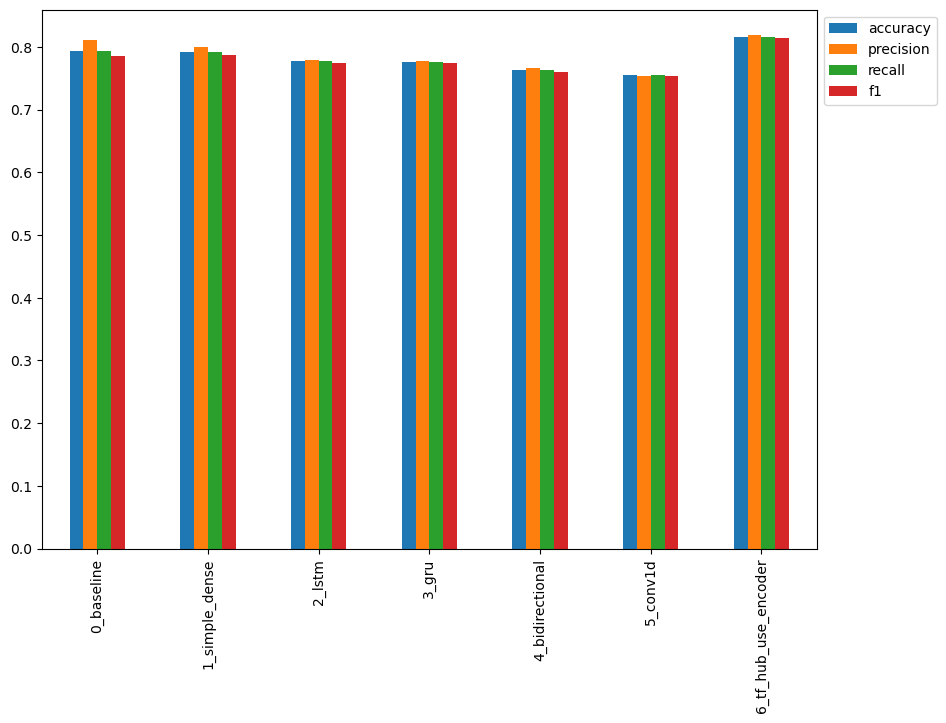

In [55]:
# Plot and compare all of the model results
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

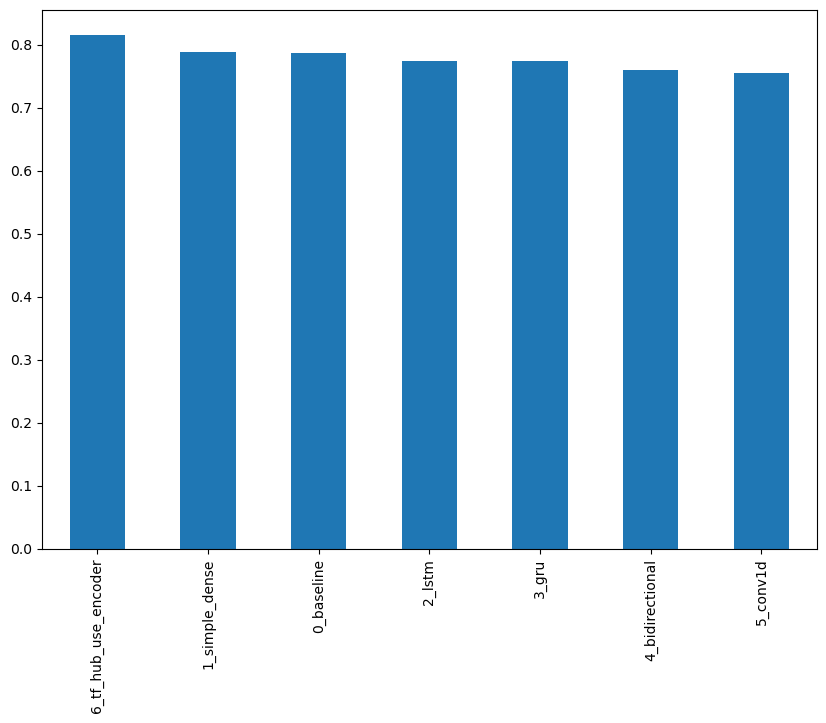

In [56]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [57]:
# # Save TF Hub Sentence Encoder model to HDF5 format
# model_6.save("model_6.h5")

# # Load model with custom Hub Layer (required HDF5 format)
# import tensorflow_hub as hub
# loaded_model_6 = tf.keras.models.load_model("model_6.h5",
#                                             custom_objects={"KerasLayer": hub.KerasLayer})

# # How does our loaded model perform?
# loaded_model_6.evaluate(val_sentences, val_labels)

# # Save TF Hub Sentence Ecnoder model to SavedModel format (default)
# model_6.save("model_6_SavedModel_format")

# # Load in a model from the SavedModel format
# loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")